In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
X = df.drop(['label'],axis=1)

In [4]:
y = df.label

In [5]:
X.shape

(20800, 4)

In [6]:
y.shape

(20800,)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer , HashingVectorizer

In [8]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
df.author.value_counts().sort_index(ascending = True)

# 1 NWO Hatr                                                                                                              17
-NO AUTHOR-                                                                                                               54
10 Habits That Will Make Your Life Easier &amp; More Peaceful - Wellness Solutions                                         1
10 More Beautiful Images That Remind You We Still Live In A Beautiful World, With Beautiful People - Upside Down Media     1
10 Movies That Could Change Your Understanding Of Life - Upside Down Media                                                 1
                                                                                                                          ..
تييري ميسان                                                                                                                1
جنگ ارزی آمریکا علیه ایران / مورد مطالعاتی سال 1390 - کدآمایی                                                              1


In [10]:
df1 = df.dropna()

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [12]:
df1.reset_index(inplace=True)

In [13]:
df1.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [14]:
import nltk

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [17]:
from nltk.corpus.reader.wordnet import WordNetError

In [18]:
import re

In [19]:
corpus = []
for i in range (0,len(df1)):
    msg = re.sub('[^a-zA-Z]'," ",df1['title'][i])
    msg = msg.lower()
    msg = msg.split()
    msg = [stemmer.stem(word) for word in msg if word not in stopwords.words('english')]
    msg = " ".join(msg)
    corpus.append(msg)

In [21]:
## Create Bag Of Words model
vectorizer = CountVectorizer(max_features = 5000, ngram_range = (1,3))
X = vectorizer.fit_transform(corpus).toarray()

In [22]:
X.shape

(18285, 5000)

In [23]:
y = df1['label']

In [24]:
## train test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [25]:
vectorizer.get_feature_names()[:10]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut']

In [28]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [32]:
count_df = pd.DataFrame(X_train,columns = vectorizer.get_feature_names())

In [33]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
from sklearn.metrics import plot_confusion_matrix
import itertools

In [45]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [35]:
### Building The Classifier

In [36]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()

In [39]:
naive.fit(X_train,y_train)
preds = naive.predict(X_test)

In [41]:
acc = accuracy_score(y_test,preds)

In [43]:
print ('accuracy = %0.3f'%acc)

accuracy = 0.893


In [46]:
cm = confusion_matrix(y_test,preds)

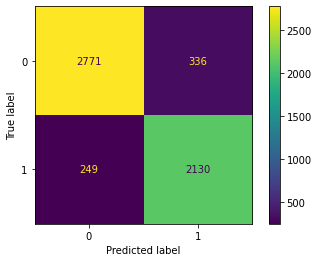

In [59]:
plot_confusion_matrix(naive, X_test, y_test) 

In [60]:
## Passive Aggressive Classifier 

In [63]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa_clf = PassiveAggressiveClassifier(max_iter=100)

In [65]:
pa_clf.fit(X_train,y_train)

PassiveAggressiveClassifier(max_iter=100)

In [66]:
preds = pa_clf.predict(X_test)

In [67]:
cm = confusion_matrix(y_test,preds)

In [68]:
print(cm)

[[2836  271]
 [ 204 2175]]


In [69]:
acc = accuracy_score(y_test,preds)

In [70]:
print("Accuracy for Passive Aggressive %.3f"%acc)

Accuracy for Passive Aggressive 0.913


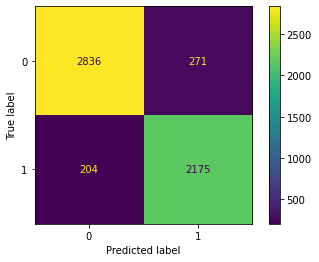

In [71]:
plot_confusion_matrix(pa_clf, X_test, y_test)

In [72]:
## naive with Hyperparameter

In [73]:
naive_clf = MultinomialNB(alpha=0.1)

In [81]:
score = 0
for alpha in np.arange(0,1,0.1):
    clf = MultinomialNB(alpha = alpha)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    if acc > score:
        naive_clf = clf
    print("Alpha: {},Accuracy: {}".format(alpha,acc))

C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\sklearn\naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0,Accuracy: 0.8880787458986511
Alpha: 0.1,Accuracy: 0.8953700328107911
Alpha: 0.2,Accuracy: 0.8955523149835946
Alpha: 0.30000000000000004,Accuracy: 0.8957345971563981
Alpha: 0.4,Accuracy: 0.8957345971563981
Alpha: 0.5,Accuracy: 0.8955523149835946
Alpha: 0.6000000000000001,Accuracy: 0.8946409041195771
Alpha: 0.7000000000000001,Accuracy: 0.8940940576011666
Alpha: 0.8,Accuracy: 0.8940940576011666
Alpha: 0.9,Accuracy: 0.8942763397739701


In [82]:
feature_names = vectorizer.get_feature_names()

In [85]:
naive_clf.coef_[0]

C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([ -8.96024796,  -8.66833755,  -9.1459651 , ..., -10.84056082,
        -8.8036789 ,  -9.37422375])

In [86]:
sorted(zip(naive_clf.coef_[0],feature_names),reverse = True)[:10]

C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-3.964525569501216, 'trump'),
 (-4.275452360326687, 'hillari'),
 (-4.3671846628834805, 'clinton'),
 (-4.8383212033168705, 'elect'),
 (-5.214139470094079, 'new'),
 (-5.22217486889384, 'comment'),
 (-5.276040416270118, 'video'),
 (-5.355763890102156, 'war'),
 (-5.369691691846625, 'hillari clinton'),
 (-5.398143113071018, 'us')]

In [88]:
## Most Fake
sorted(zip(naive_clf.coef_[0],feature_names))[:20]

[(-10.840560823592812, 'abroad'),
 (-10.840560823592812, 'abus new'),
 (-10.840560823592812, 'abus new york'),
 (-10.840560823592812, 'accid'),
 (-10.840560823592812, 'act new'),
 (-10.840560823592812, 'act new york'),
 (-10.840560823592812, 'adopt'),
 (-10.840560823592812, 'advic'),
 (-10.840560823592812, 'advis new'),
 (-10.840560823592812, 'advis new york'),
 (-10.840560823592812, 'age new'),
 (-10.840560823592812, 'age new york'),
 (-10.840560823592812, 'agenda breitbart'),
 (-10.840560823592812, 'aleppo new'),
 (-10.840560823592812, 'aleppo new york'),
 (-10.840560823592812, 'ali'),
 (-10.840560823592812, 'amazon'),
 (-10.840560823592812, 'america breitbart'),
 (-10.840560823592812, 'america new york'),
 (-10.840560823592812, 'american breitbart')]

### TF-IDF Model 

In [89]:
df1.shape

(18285, 6)

In [93]:
df1.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [94]:
df2 = df1.drop(['label'],axis=1)

In [95]:
y = df1['label']

In [96]:
corpus = []
for i in range (0,len(df1)):
    msg = re.sub('[^a-zA-Z]'," ",df2['title'][i])
    msg = msg.lower()
    msg = msg.split()
    msg = [stemmer.stem(word) for word in msg if word not in stopwords.words('english')]
    msg = " ".join(msg)
    corpus.append(msg)

In [97]:
## Create TF-IDF model
tf_idf = TfidfVectorizer(max_features = 5000, ngram_range = (1,3))
X = tf_idf.fit_transform(corpus).toarray()

In [98]:
## train test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [99]:
tf_idf.get_feature_names()[:10]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut']

In [100]:
naive_tf_idf = MultinomialNB()

In [101]:
naive_tf_idf.fit(X_train,y_train)

MultinomialNB()

In [102]:
naive_tf_idf.fit(X_train,y_train)
y_pred = naive_tf_idf.predict(X_test)

In [103]:
acc = accuracy_score(y_test,y_pred)

In [104]:
print ('accuracy = %0.3f'%acc)

accuracy = 0.876


In [105]:
cm = confusion_matrix(y_test,preds)

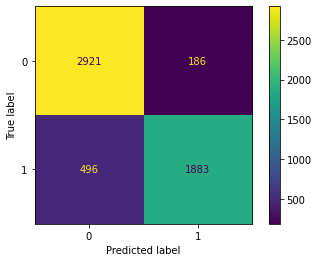

In [106]:
plot_confusion_matrix(naive_tf_idf, X_test, y_test)